<h1>Ciência dos Dados - 2021.1: Projeto 2</h1>
<h2>Previsão de metascore a partir de dados secundários</h2>

<h3>Integrantes:</h3>

- Gabriel Hideki Stanzani Onishi
- Lucca de Paiva Barroso Saraiva

<h2>Objetivos do Projeto</h2>

A arte é integral para a evolução do ser humano. Expressar-se através de um poema, de um desenho ou de um filme é parte do que nos faz únicos nesse planeta. Não é a toa que para alguns filósofos, como o alemão Friedrich Nietzsche, a arte é o motor que nos faz evoluir como espécie, sendo a nossa esperança de chegar na melhor versão de nós mesmos. Tão notável quanto a arte em si, contudo, é a impressão que a acompanha.

Todos saímos de um filme com uma impressão diferente, mas são poucos que tem a sua opinião validada e levada para milhares de outras pessoas. Críticos são os responsáveis pela dificílima tarefa de fazer o julgamento mais próximo da verdade e transmiti-lo para aqueles que ainda não puderam experenciar a obra (além daqueles que querem ter o seu julgamento comparado, é claro). Não há, entretanto, um conjunto de regras que esses profissionais tenham que seguir$^1$ para resumir em uma nota algo tão subjetivo quanto um filme, o que faz com que certos vieses manifestem-se.

Um exemplo claro está presente na maior premiação anual de cinema. Os prêmios da Academia de Cinema dos Estados Unidos ou, como são popularmente conhecidos, os Oscars, tem um segredo que poucos sabem. Os vencedores de melhor filme do evento seguem um notável padrão, e filmes que o respeitam recebem até receberam um apelido: "Oscar Baits", ou Iscas de Oscar. Em um estudo mencionado nesse <a href='https://www.businessinsider.com/oscars-academy-awards-rigged-best-picture-nominations-win-2019-2?op=1'>artigo</a> da Business Insider revela que assustadores 94% dos vencedores pertencem à categoria drama contra apenas 2% de filmes de ação e aventura. Além disso, o texto sugere que há uma preferência para filmes longos (e portanto teoricamente mais importantes) - 76% dos vencedores desde 1960 têm mais de duas horas de duração.

Munidos da curiosidade de verificar esses viéses em uma base de dados maior, os alunos se propuseram a analisar um conjunto de mais de 80 mil filmes para que, através de dados secundários (como gênero, duração, país de origem e língua principal), seja possível estimar o metascore$^2$ de outros longas. Esperamos que esse estudo sirva de inspiração para que se desmistifique a nota de críticos como autoridades absolutas, dando mais conforto para que aqueles que gostem de cinema possam ter opinião própria sem precisar se basear em reviews.

$^1$É claro que houve tentativas na história da filosofia de se padronizar a forma de crítica da arte. O empirista escocês David Hume foi um dos teóricos dessa área, tendo escrito uma série de regras para que o "tastemaker" (ou fazedor de gosto, numa tradução literal) chegue o mais próximo possível de uma resenha informal acerca do objeto estudado.<br>
$^2$Metascore é uma nota atribuida sobre uma obra pelo site Metascore. Para a nota final, leva-se em conta um conjunto de críticas de meios de comunicação

<h2> Parte 0: Importando elementos</h2>

In [1]:
#Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import stats

In [2]:
# Importando planilha de dados brutos
dados_bruto = pd.read_csv('IMDb movies.csv')
#Mostrando o dataset inicial
dados_bruto.head()

C:\Users\lucca\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


<h2>Parte I: Limpeza inicial</h2>

In [3]:
#Seleção de Colunas relevantes
dados = dados_bruto[['title','year', 'genre', 'country', 'language','worlwide_gross_income','budget', 'metascore', 'duration' ]]

#Remoção de valores nulos (NaN)
dados = dados.dropna()
dados

,title,year,genre,country,language,worlwide_gross_income,budget,metascore,duration
506,Metropolis,1927,"Drama, Sci-Fi",Germany,German,$ 1349711,DEM 6000000,98.0,153
628,Il circo,1928,"Comedy, Romance",USA,English,$ 26916,$ 900000,90.0,72
1048,Luci della città,1931,"Comedy, Drama, Romance",USA,English,$ 46008,$ 1500000,99.0,87
1086,Frankenstein,1931,"Drama, Horror, Romance",USA,"English, Latin",$ 1626,$ 291000,91.0,70
1301,Freaks,1932,"Drama, Horror",USA,"English, German, French",$ 4072,$ 310607,80.0,64
...,...,...,...,...,...,...,...,...,...
85397,Jexi,2019,"Comedy, Romance","USA, Canada",English,$ 9341824,$ 5000000,39.0,84
85460,Weathering with You,2019,"Animation, Drama, Family","Japan, China",Japanese,$ 193176979,$ 11100000,72.0,112
85503,Tommaso,2019,Drama,"Italy, UK, USA, Greece","English, Italian, Russian",$ 23588,EUR 3000000,66.0,115
85592,Quezon's Game,2018,"Drama, History",Philippines,English,$ 5986,$ 500000,36.0,127


In [4]:
#analisando o tipo de dados de cada uma das colunas
dados.dtypes

title                     object
year                      object
genre                     object
country                   object
language                  object
worlwide_gross_income     object
budget                    object
metascore                float64
duration                   int64
dtype: object

In [5]:
#Fazendo seleção de uma planilha de treinamento com filmes do ano de 1985 - 2000
#Dessa forma minimizamos a depreciação do dinheiro (inflação)

#todos dados estão como object, por isso é necessário trocar para os tipos de variáveis adequados
dados.year = dados.year.astype('int')
dados = dados.loc[(dados.year>=1985) & (dados.year<=2000),:]
dados.head()

,title,year,genre,country,language,worlwide_gross_income,budget,metascore,duration
21389,Il gioco del falco,1985,"Biography, Crime, Drama","UK, USA, Mexico",English,$ 17130087,$ 12000000,68.0,131
21425,Godzilla 1985,1985,"Action, Horror, Sci-Fi",Japan,"Japanese, Russian, English",$ 4116395,$ 2000000,31.0,82
21784,Fuori orario,1985,"Comedy, Crime, Drama",USA,English,$ 10609321,$ 4500000,90.0,97
21785,Agnese di Dio,1985,"Drama, Mystery",USA,"English, French, Latin",$ 25627836,$ 10000000,52.0,98
21795,Guerriero americano,1985,"Action, Adventure, Romance","USA, Philippines","English, Spanish, Japanese",$ 10499694,$ 1000000,20.0,95


In [6]:
# Selecionando apenas filmes com budget medido em dólar (começa com $) para uniformizar
dados = dados.loc[dados.budget.str.startswith('$'),:]

#Removendo cifrão da tabela de bilheteria e budget para trabalharmos com float
#Removendo vírgulas das colunas de gênero, country e language para guardarmos eles em variáveis adequadas
def removepont(text):
    cif = '[$,]' 
    pattern = re.compile(cif)
    text_subbed = re.sub(pattern,'', text)
    return text_subbed

dados.worlwide_gross_income = dados.worlwide_gross_income.apply(removepont)
dados.budget = dados.budget.apply(removepont)
dados.genre = dados.genre.apply(removepont)
dados.country = dados.country.apply(removepont)
dados.language = dados.language.apply(removepont)
dados.worlwide_gross_income = dados.worlwide_gross_income.astype('float')
dados.year = dados.year.astype('int')
dados.budget = dados.budget.astype('float')

In [7]:
#Verificando estado atual da base de dados
dados.head(5)

,title,year,genre,country,language,worlwide_gross_income,budget,metascore,duration
21389,Il gioco del falco,1985,Biography Crime Drama,UK USA Mexico,English,17130087.0,12000000.0,68.0,131
21425,Godzilla 1985,1985,Action Horror Sci-Fi,Japan,Japanese Russian English,4116395.0,2000000.0,31.0,82
21784,Fuori orario,1985,Comedy Crime Drama,USA,English,10609321.0,4500000.0,90.0,97
21785,Agnese di Dio,1985,Drama Mystery,USA,English French Latin,25627836.0,10000000.0,52.0,98
21795,Guerriero americano,1985,Action Adventure Romance,USA Philippines,English Spanish Japanese,10499694.0,1000000.0,20.0,95


In [8]:
#criando uma coluna para cada tipo de gênero (selecionamos apenas 3 que consideramos os principais)
dados['drama'] = 0
dados['comedy'] = 0
dados['action'] = 0
dados

,title,year,genre,country,language,worlwide_gross_income,budget,metascore,duration,drama,comedy,action
21389,Il gioco del falco,1985,Biography Crime Drama,UK USA Mexico,English,17130087.0,12000000.0,68.0,131,0,0,0
21425,Godzilla 1985,1985,Action Horror Sci-Fi,Japan,Japanese Russian English,4116395.0,2000000.0,31.0,82,0,0,0
21784,Fuori orario,1985,Comedy Crime Drama,USA,English,10609321.0,4500000.0,90.0,97,0,0,0
21785,Agnese di Dio,1985,Drama Mystery,USA,English French Latin,25627836.0,10000000.0,52.0,98,0,0,0
21795,Guerriero americano,1985,Action Adventure Romance,USA Philippines,English Spanish Japanese,10499694.0,1000000.0,20.0,95,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38782,Digimon - Il film,2000,Animation Action Adventure,USA Japan,English,16643191.0,5000000.0,20.0,82,0,0,0
38798,Roozi ke zan shodam,2000,Comedy Drama,Iran,Persian,149971.0,180000.0,84.0,78,0,0,0
38898,George Washington,2000,Drama,USA,English,283846.0,42000.0,82.0,89,0,0,0
39130,Battle Royale,2000,Action Adventure Drama,Japan,Japanese,958989.0,4500000.0,81.0,114,0,0,0


In [9]:
# reindexando as linhas para facilitar trabalho
dados.reset_index(inplace=True)

In [10]:
#lendo a coluna genre de cada linha e vendo a qual gênero pertence
for i in range(len(dados)):
    for genre in dados.iloc[i].genre.split():
        if genre == 'Drama':
            dados.at[i,'drama'] = 1
        if genre == 'Comedy':
            dados.at[i,'comedy'] = 1
        if genre == 'Action':
            dados.at[i,'action'] = 1

In [11]:
dados.head(5)

,index,title,year,genre,country,language,worlwide_gross_income,budget,metascore,duration,drama,comedy,action
0,21389,Il gioco del falco,1985,Biography Crime Drama,UK USA Mexico,English,17130087.0,12000000.0,68.0,131,1,0,0
1,21425,Godzilla 1985,1985,Action Horror Sci-Fi,Japan,Japanese Russian English,4116395.0,2000000.0,31.0,82,0,0,1
2,21784,Fuori orario,1985,Comedy Crime Drama,USA,English,10609321.0,4500000.0,90.0,97,1,1,0
3,21785,Agnese di Dio,1985,Drama Mystery,USA,English French Latin,25627836.0,10000000.0,52.0,98,1,0,0
4,21795,Guerriero americano,1985,Action Adventure Romance,USA Philippines,English Spanish Japanese,10499694.0,1000000.0,20.0,95,0,0,1


In [12]:
#Fazendo o mesmo processo para língua e para país de origem
#Buscamos diferenciar filmes feitos nos EUA do resto do mundo e filmes em ingles com filmes em língua estrangeiros
dados['americano'] = 0
dados['em_ingles'] = 0

In [13]:
for i in range(len(dados)):
    for country in dados.iloc[i].country.split():
        if country == 'USA':
            dados.at[i,'americano'] = 1
            break
        else:
            dados.at[i,'americano'] = 0
    for lang in dados.iloc[i].language.split():
        if lang =='English':
            dados.at[i,'em_ingles'] = 1
            break
        else:
            dados.at[i,'em_ingles'] = 0

<h2>Parte 2: Análise Exploratória</h2>

<h3>Analisando Distribuição de Metascore</h3>

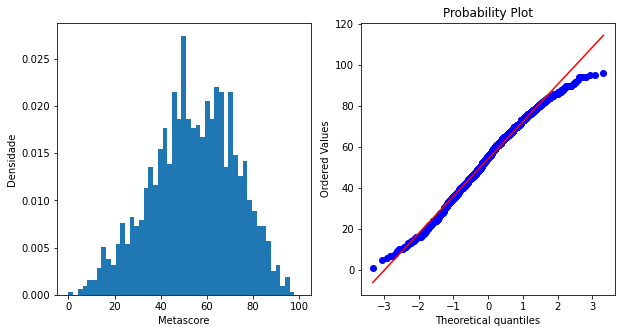

In [14]:
# Fazendo análise da distribuição do metascore
plt.figure(figsize=(10,5))

plt.subplot(121)
faixa = np.linspace(0,100,50)
plt.hist(dados.metascore,density=True,bins=faixa)
plt.xlabel('Metascore')
plt.ylabel('Densidade')

plt.subplot(122)
stats.probplot(dados.metascore,dist='norm',plot=plt)
plt.show()

Como se pode observar, o metascore tem uma distribuição próxima à normal, apesar de ter caudas mais expressivas

<h3> Analisando Correlação Metascore-Duração

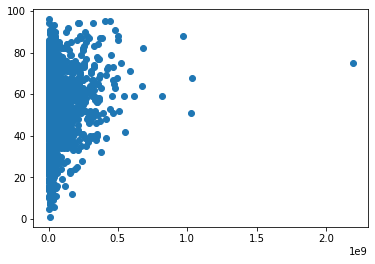

In [15]:
plt.scatter(dados['worlwide_gross_income'], dados.metascore)
plt.show()

In [16]:
#outlier na coluna de receita mundial
dados = dados.loc[dados['worlwide_gross_income']<2000000000,:]

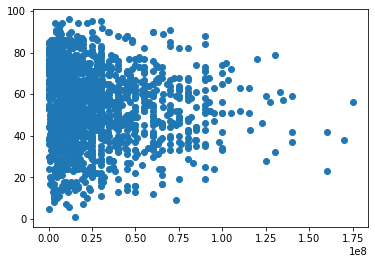

In [17]:
plt.scatter(dados.budget,dados.metascore)
plt.show()

In [18]:
dados.budget.corr(dados.metascore)

-0.080842673448128

O orçamento não parece ter um efeito muito grande no metascore.

<h3>Analisando Para Gêneros Diferentes</h3>

In [19]:
filme_acao = dados.loc[dados.action==1]
filme_drama = dados.loc[dados.drama==1]
filme_comedia = dados.loc[dados.comedy==1]

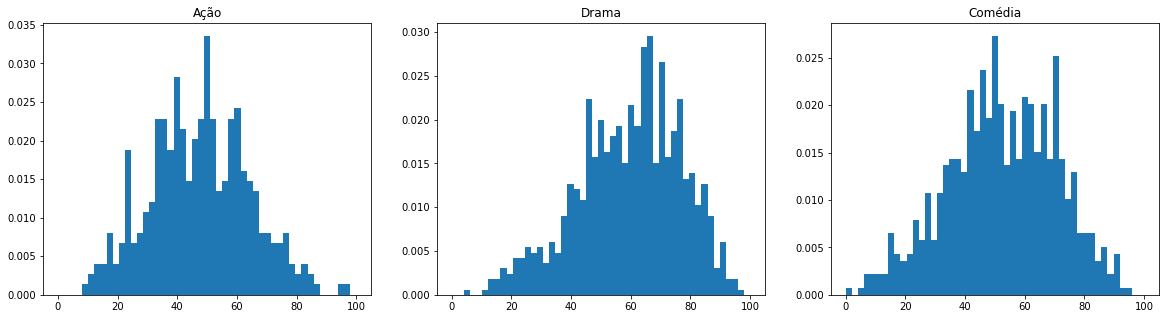

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(filme_acao.metascore,density=True,bins=faixa)
plt.title('Ação')

plt.subplot(132)
plt.hist(filme_drama.metascore,density=True,bins=faixa)
plt.title('Drama')

plt.subplot(133)
plt.hist(filme_comedia.metascore,density=True,bins=faixa)
plt.title('Comédia')

plt.show()

In [21]:
print(f'A média do metascore de filmes da categoria drama é {filme_drama.metascore.mean()}')
print(f'A média do metascore de filmes da categoria comédia é {filme_comedia.metascore.mean()}')
print(f'A média do metascore de filmes da categoria ação é {filme_acao.metascore.mean()}')

A média do metascore de filmes da categoria drama é 59.54064039408867
A média do metascore de filmes da categoria comédia é 52.38563049853372
A média do metascore de filmes da categoria ação é 47.50958904109589


<h3>Analisando Para Línguas e Países Diferentes</h3>

In [22]:
filme_americano = dados.loc[dados.americano==1]
filme_estrangeiro = dados.loc[dados.americano==0]
filme_em_ingles = dados.loc[dados.em_ingles==1]
filme_sem_ingles = dados.loc[dados.em_ingles==0]

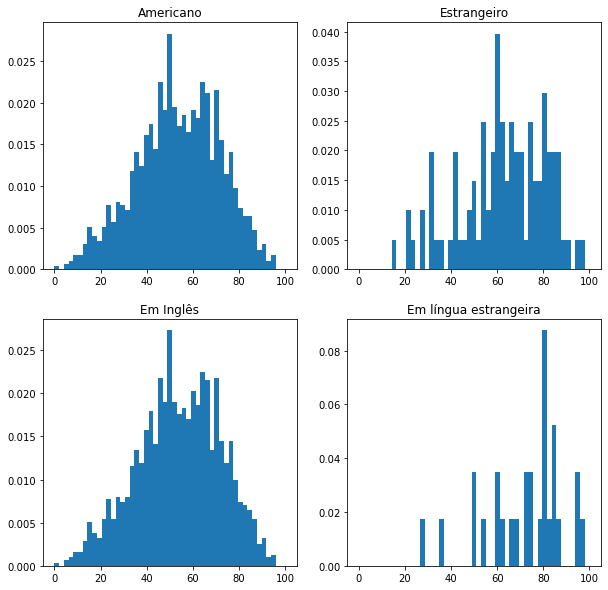

In [23]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.hist(filme_americano.metascore,density=True,bins=faixa)
plt.title('Americano')

plt.subplot(222)
plt.hist(filme_estrangeiro.metascore,density=True,bins=faixa)
plt.title('Estrangeiro')

plt.subplot(223)
plt.hist(filme_em_ingles.metascore,density=True,bins=faixa)
plt.title('Em Inglês')

plt.subplot(224)
plt.hist(filme_sem_ingles.metascore,density=True,bins=faixa)
plt.title('Em língua estrangeira')

plt.show()

In [24]:
print(f'A média do metascore de filmes americanos é {filme_americano.metascore.mean()}')
print(f'A média do metascore de filmes estrangeiros é {filme_estrangeiro.metascore.mean()}')
print(f'A média do metascore de filmes em inglês é {filme_em_ingles.metascore.mean()}')
print(f'A média do metascore de filmes em língua estrangeira é {filme_sem_ingles.metascore.mean()}')

A média do metascore de filmes americanos é 53.644917582417584
A média do metascore de filmes estrangeiros é 62.57575757575758
A média do metascore de filmes em inglês é 53.88539620170268
A média do metascore de filmes em língua estrangeira é 72.10714285714286


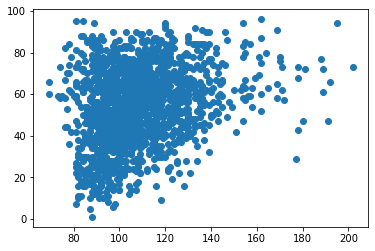

In [25]:
plt.scatter(dados.duration, dados.metascore)

In [26]:
dados.duration.corr(dados.metascore)

0.27282851451587986

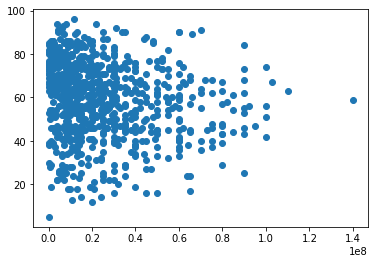

In [27]:
dados_drama = dados.loc[dados.drama==1,:]

plt.scatter(dados_drama.budget, dados_drama.metascore)

In [28]:
dados_drama.budget.corr(dados_drama.metascore)

-0.1737394198473818

In [29]:
dados_ndrama = dados.loc[dados.drama==0,:]
dados_ndrama.budget.corr(dados_ndrama.metascore)



0.057449183996364186

In [30]:
dados_acao = dados.loc[dados.action==1,:]
dados_nacao = dados.loc[dados.action==0,:]

In [31]:
dados_acao.budget.corr(dados_acao.metascore)

0.10604185893844252

In [32]:
dados_nacao.budget.corr(dados_nacao.metascore)

-0.08390990689687469

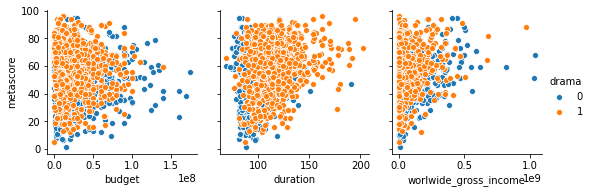

In [33]:
import seaborn as sns
sns.pairplot(dados,x_vars=['budget','duration', 'worlwide_gross_income'],y_vars=['metascore'],hue='drama')

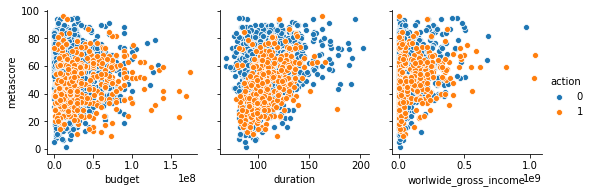

In [34]:
sns.pairplot(dados,x_vars=['budget','duration', 'worlwide_gross_income'],y_vars=['metascore'],hue='action')

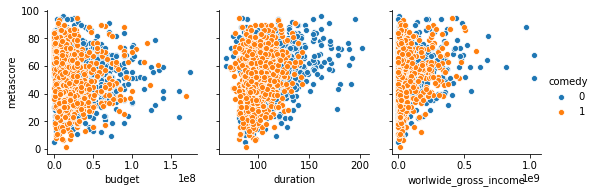

In [35]:
sns.pairplot(dados,x_vars=['budget','duration', 'worlwide_gross_income'],y_vars=['metascore'],hue='comedy')

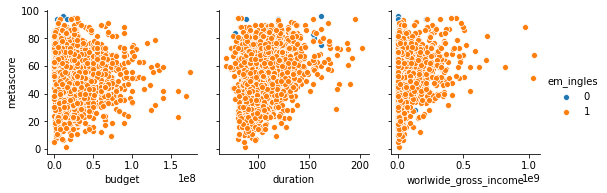

In [36]:
sns.pairplot(dados,x_vars=['budget','duration', 'worlwide_gross_income'],y_vars=['metascore'],hue='em_ingles')

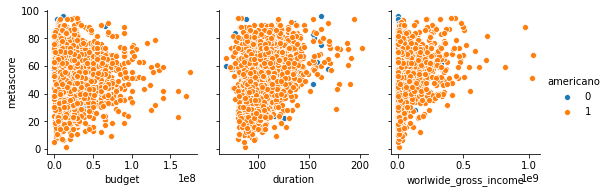

In [37]:
sns.pairplot(dados,x_vars=['budget','duration', 'worlwide_gross_income'],y_vars=['metascore'],hue='americano')

In [38]:
dados.corr()

,index,year,worlwide_gross_income,budget,metascore,duration,drama,comedy,action,americano,em_ingles
index,1.000000,0.965832,0.054125,0.262667,-0.090584,0.026878,0.105556,-0.001379,-0.082589,-0.035643,-0.116656
year,0.965832,1.000000,0.093252,0.330142,-0.080583,0.055627,0.105310,-0.000222,-0.075098,0.004921,-0.055584
worlwide_gross_income,0.054125,0.093252,1.000000,0.535079,0.162309,0.236461,-0.119359,-0.054845,0.192611,0.106962,0.054704
budget,0.262667,0.330142,0.535079,1.000000,-0.080843,0.302360,-0.121682,-0.089462,0.275030,0.140439,0.098066
metascore,-0.090584,-0.080583,0.162309,-0.080843,1.000000,0.272829,0.305845,-0.088727,-0.203904,-0.119752,-0.133071
duration,0.026878,0.055627,0.236461,0.302360,0.272829,1.000000,0.386472,-0.342322,0.033355,-0.053490,-0.002383
drama,0.105556,0.105310,-0.119359,-0.121682,0.305845,0.386472,1.000000,-0.267577,-0.263055,-0.059604,-0.032713
comedy,-0.001379,-0.000222,-0.054845,-0.089462,-0.088727,-0.342322,-0.267577,1.000000,-0.235707,0.087157,0.051463
action,-0.082589,-0.075098,0.192611,0.275030,-0.203904,0.033355,-0.263055,-0.235707,1.000000,0.007693,-0.039112
americano,-0.035643,0.004921,0.106962,0.140439,-0.119752,-0.053490,-0.059604,0.087157,0.007693,1.000000,0.459882


In [118]:
Y = dados['metascore']

In [119]:
X = dados[['action', 'drama', 'comedy', 'budget', 'em_ingles', 'americano', 'worlwide_gross_income', 'duration']]
#X = dados[['drama', 'duration', 'worlwide_gross_income']]

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(933, 8)
(622, 8)
(933,)
(622,)


In [121]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [122]:
print(model.intercept_)

54.5457410397148


In [123]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
action,-7.759837e+00
drama,6.640126e+00
comedy,-1.563957e+00
budget,-1.304684e-07
em_ingles,-1.809778e+01
americano,-2.618928e+00
worlwide_gross_income,5.354440e-08
duration,1.723828e-01


In [124]:
predictions = model.predict(X_test)
predictions

array([ 52.90232381,  44.95638756,  58.30739307,  55.39144654,
        63.7992476 ,  79.13328082,  61.73228778,  48.19239839,
        48.76296835,  59.59117809,  40.43072889,  40.23980589,
        60.03774987,  46.30444437,  56.35717615,  46.11931112,
        56.24949289,  56.51984202,  43.59104846,  58.6402857 ,
        55.42682132,  58.95054272,  48.15252502,  55.50860142,
        57.07413447,  57.55824535,  37.11932906,  67.84196736,
        57.53323802,  52.43571427,  56.33010689,  55.45166134,
        47.51585372,  55.60729768,  47.78922336,  50.03717408,
        53.70165606,  45.92508015,  50.196742  ,  50.62451758,
        52.91278742,  55.28966667,  42.44786398,  75.08914136,
        51.92694876,  58.68000311,  55.98423079,  46.47543706,
        50.10838398,  56.84393396,  63.74696254,  64.42637616,
        65.43601452,  64.03682867,  61.14139169,  55.11396279,
        59.33419576,  53.39556097,  62.4029089 ,  51.06012165,
        52.69394917,  58.59217711,  62.53094311,  60.69

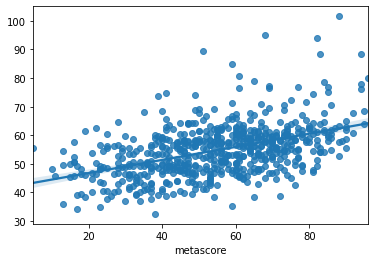

In [125]:
sns.regplot(y_test,predictions)

In [126]:
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              metascore   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     35.65
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           2.35e-49
Time:                        20:49:20   Log-Likelihood:                -3899.5
No. Observations:                 933   AIC:                             7817.
Df Residuals:                     924   BIC:                             7861.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    54.54

In [146]:
X2 = dados[['duration']]


X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size=0.4, random_state=101)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(933, 1)
(622, 1)
(933,)
(622,)


In [147]:
model2 = LinearRegression()
model2.fit(X2_train,y2_train)

LinearRegression()

In [148]:
print(model2.intercept_)

24.774956706497058


In [149]:
coeff_parameter = pd.DataFrame(model2.coef_,X2.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
duration,0.269387


In [150]:
predictions2 = model2.predict(X2_test)
predictions2

array([46.59529784, 50.0973279 , 50.63610175, 56.83200109, 58.71770958,
       60.60341807, 53.59935796, 49.28916712, 56.56261416, 54.67690567,
       48.2116194 , 52.79119717, 58.44832265, 60.06464422, 49.28916712,
       51.71364946, 54.13813181, 52.25242332, 53.86874488, 54.40751874,
       53.32997103, 53.59935796, 50.90548868, 50.90548868, 53.32997103,
       55.75445338, 46.86468477, 60.60341807, 51.44426254, 50.36671483,
       53.86874488, 48.2116194 , 50.63610175, 50.90548868, 49.01978019,
       52.79119717, 55.21567952, 47.67284555, 51.17487561, 54.13813181,
       47.40345862, 53.32997103, 50.0973279 , 48.48100633, 50.0973279 ,
       56.83200109, 51.17487561, 54.13813181, 51.17487561, 56.83200109,
       65.18299584, 51.44426254, 59.79525729, 52.25242332, 53.86874488,
       47.40345862, 61.95035271, 47.67284555, 60.06464422, 55.21567952,
       53.86874488, 63.8360612 , 60.06464422, 60.33403115, 48.2116194 ,
       55.75445338, 51.17487561, 68.14625204, 56.83200109, 53.32

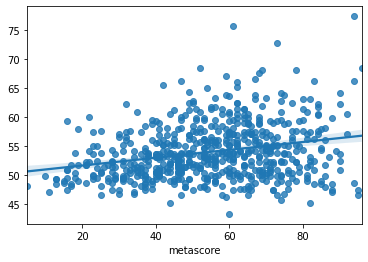

In [151]:
sns.regplot(y2_test,predictions2)

In [152]:
X2_train_Sm= sm.add_constant(X2_train)
X2_train_Sm= sm.add_constant(X2_train)
ls2=sm.OLS(y2_train,X2_train_Sm).fit()
print(ls2.summary())

                            OLS Regression Results                            
Dep. Variable:              metascore   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     80.32
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.71e-18
Time:                        20:55:59   Log-Likelihood:                -3986.4
No. Observations:                 933   AIC:                             7977.
Df Residuals:                     931   BIC:                             7987.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7750      3.304      7.500      0.0

In [111]:
import statsmodels.api as sm

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [112]:
#sns.pairplot(dados, height=1.5);

In [113]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     57.69
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.93e-82
Time:                        20:46:45   Log-Likelihood:                -6515.8
No. Observations:                1555   AIC:                         1.305e+04
Df Residuals:                    1546   BIC:                         1.310e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    49.4691      4.169     11.866      0.000      41.291      57.647
action                   -7.0113      1.084     -6.471      0.000      -9.137      -4.886
drama                     6.9042      0.977      7.068      0.000       4.988       8.820
comedy                   -0.0943      0.929     -0.102      0.919      -1.916       1.727
budget                 -1.48e-07   1.96e-08     -7.549      0.000   -1.86e-07    -1.1e-07
em_ingles               -14.3752      3.452     -4.164      0.000     -21.147      -7.603
americano                -3.7193      1.900     -1.958      0.050      -7.446       0.008
worlwide_gross_income  4.889e-08   4.44e-09     11.011      0.000    4.02e-08    5.76e-08
duration                  0.1932      0.027      7.174      0.000       0.140       0.246
==============================================================================
Omnibus:                       21.043   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.598
Skew:                          -0.233   Prob(JB):                     5.55e-05
Kurtosis:                       2.708   Cond. No.                     1.61e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

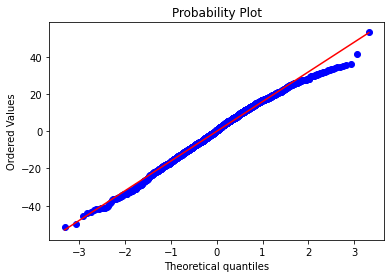

In [114]:
stats.probplot(results.resid, dist='norm', plot=plt)
plt.show()

In [115]:
Y = dados['metascore']

X2 = dados[['action', 'drama', 'comedy', 'budget', 'em_ingles', 'americano', 'worlwide_gross_income', 'duration']]


results2 = results # Modelo com todas as variáveis
display(results.summary())


while len(results2.params)>3:
    
    
    
    # Identifica variável com maior valor-p
    i = list(results2.pvalues).index(results2.pvalues.max())    
    remove = results2.pvalues.index[i]
    X2.drop(remove, axis=1, inplace=True)
    print("REMOVIDA A VARIÁVEL ", remove)
    
    print("\n\n")
    results2 = regress(Y,X2)
    display(results2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     57.69
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.93e-82
Time:                        20:46:47   Log-Likelihood:                -6515.8
No. Observations:                1555   AIC:                         1.305e+04
Df Residuals:                    1546   BIC:                         1.310e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    49.4691      4.169     11.866      0.000      41.291      57.647
action                   -7.0113      1.084     -6.471      0.000      -9.137      -4.886
drama                     6.9042      0.977      7.068      0.000       4.988       8.820
comedy                   -0.0943      0.929     -0.102      0.919      -1.916       1.727
budget                 -1.48e-07   1.96e-08     -7.549      0.000   -1.86e-07    -1.1e-07
em_ingles               -14.3752      3.452     -4.164      0.000     -21.147      -7.603
americano                -3.7193      1.900     -1.958      0.050      -7.446       0.008
worlwide_gross_income  4.889e-08   4.44e-09     11.011      0.000    4.02e-08    5.76e-08
duration                  0.1932      0.027      7.174      0.000       0.140       0.246
==============================================================================
Omnibus:                       21.043   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.598
Skew:                          -0.233   Prob(JB):                     5.55e-05
Kurtosis:                       2.708   Cond. No.                     1.61e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

REMOVIDA A VARIÁVEL  comedy





C:\Users\lucca\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     65.97
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           2.30e-83
Time:                        20:46:47   Log-Likelihood:                -6515.8
No. Observations:                1555   AIC:                         1.305e+04
Df Residuals:                    1547   BIC:                         1.309e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    49.3531      4.008     12.312      0.000      41.491      57.216
action                   -6.9780      1.033     -6.757      0.000      -9.004      -4.952
drama                     6.9271      0.950      7.290      0.000       5.063       8.791
budget                 -1.48e-07   1.96e-08     -7.555      0.000   -1.86e-07    -1.1e-07
em_ingles               -14.3760      3.451     -4.166      0.000     -21.146      -7.606
americano                -3.7301      1.896     -1.967      0.049      -7.450      -0.010
worlwide_gross_income  4.888e-08   4.44e-09     11.014      0.000    4.02e-08    5.76e-08
duration                  0.1938      0.026      7.392      0.000       0.142       0.245
==============================================================================
Omnibus:                       21.046   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.600
Skew:                          -0.233   Prob(JB):                     5.54e-05
Kurtosis:                       2.708   Cond. No.                     1.58e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

REMOVIDA A VARIÁVEL  americano





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     76.18
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.71e-83
Time:                        20:46:47   Log-Likelihood:                -6517.7
No. Observations:                1555   AIC:                         1.305e+04
Df Residuals:                    1548   BIC:                         1.309e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    48.4657      3.987     12.157      0.000      40.646      56.285
action                   -6.9630      1.034     -6.737      0.000      -8.990      -4.936
drama                     6.9080      0.951      7.264      0.000       5.043       8.773
budget                -1.515e-07   1.95e-08     -7.758      0.000    -1.9e-07   -1.13e-07
em_ingles               -17.4365      3.083     -5.655      0.000     -23.485     -11.388
worlwide_gross_income  4.843e-08   4.44e-09     10.916      0.000    3.97e-08    5.71e-08
duration                  0.1987      0.026      7.607      0.000       0.147       0.250
==============================================================================
Omnibus:                       20.450   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.018
Skew:                          -0.229   Prob(JB):                     7.42e-05
Kurtosis:                       2.710   Cond. No.                     1.56e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

REMOVIDA A VARIÁVEL  em_ingles





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     83.35
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.15e-77
Time:                        20:46:47   Log-Likelihood:                -6533.6
No. Observations:                1555   AIC:                         1.308e+04
Df Residuals:                    1549   BIC:                         1.311e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    31.0968      2.567     12.115      0.000      26.062      36.132
action                   -6.5241      1.041     -6.268      0.000      -8.566      -4.482
drama                     7.0353      0.960      7.327      0.000       5.152       8.919
budget                -1.622e-07   1.96e-08     -8.260      0.000   -2.01e-07   -1.24e-07
worlwide_gross_income  4.824e-08   4.48e-09     10.766      0.000    3.94e-08     5.7e-08
duration                  0.2022      0.026      7.665      0.000       0.150       0.254
==============================================================================
Omnibus:                       17.040   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.892
Skew:                          -0.207   Prob(JB):                     0.000354
Kurtosis:                       2.728   Cond. No.                     8.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

REMOVIDA A VARIÁVEL  action





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     92.09
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           2.57e-70
Time:                        20:46:47   Log-Likelihood:                -6553.1
No. Observations:                1555   AIC:                         1.312e+04
Df Residuals:                    1550   BIC:                         1.314e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    30.4750      2.596     11.738      0.000      25.382      35.568
drama                     8.4616      0.944      8.961      0.000       6.609      10.314
budget                -1.838e-07   1.96e-08     -9.394      0.000   -2.22e-07   -1.45e-07
worlwide_gross_income  4.729e-08   4.53e-09     10.433      0.000    3.84e-08    5.62e-08
duration                  0.1929      0.027      7.235      0.000       0.141       0.245
==============================================================================
Omnibus:                       18.611   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.001
Skew:                          -0.186   Prob(JB):                     0.000335
Kurtosis:                       2.670   Cond. No.                     8.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

REMOVIDA A VARIÁVEL  duration





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     102.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           3.03e-60
Time:                        20:46:47   Log-Likelihood:                -6578.9
No. Observations:                1555   AIC:                         1.317e+04
Df Residuals:                    1551   BIC:                         1.319e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    48.4049      0.787     61.473      0.000      46.860      49.949
drama                    11.5792      0.854     13.558      0.000       9.904      13.254
budget                -1.455e-07   1.91e-08     -7.599      0.000   -1.83e-07   -1.08e-07
worlwide_gross_income  5.176e-08   4.56e-09     11.341      0.000    4.28e-08    6.07e-08
==============================================================================
Omnibus:                       28.627   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.197
Skew:                          -0.285   Prob(JB):                     1.24e-06
Kurtosis:                       2.693   Cond. No.                     3.32e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

REMOVIDA A VARIÁVEL  budget





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              metascore   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     119.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           4.51e-49
Time:                        20:46:47   Log-Likelihood:                -6607.4
No. Observations:                1555   AIC:                         1.322e+04
Df Residuals:                    1552   BIC:                         1.324e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    45.5687      0.706     64.555      0.000      44.184      46.953
drama                    12.0265      0.867     13.864      0.000      10.325      13.728
worlwide_gross_income  3.344e-08   3.95e-09      8.475      0.000    2.57e-08    4.12e-08
==============================================================================
Omnibus:                       31.141   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.732
Skew:                          -0.226   Prob(JB):                     4.26e-06
Kurtosis:                       2.580   Cond. No.                     3.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

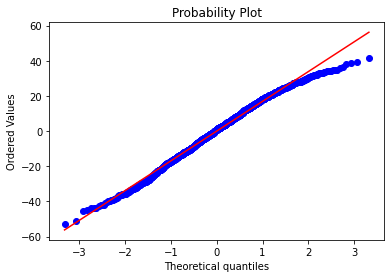

In [116]:
#verificando a normalidade dos residuos(erros)
residuos = results2.resid

plt.figure(figsize=(6,4))
stats.probplot(residuos, dist='norm', plot=plt);

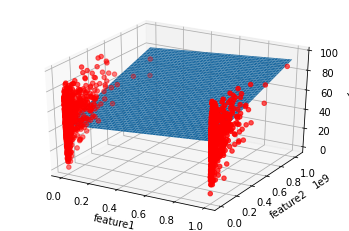

In [117]:
feature1 = X2["drama"]
feature2 = X2["worlwide_gross_income"]

# Recupera os parâmetros calculados
beta0_hat = results2.params[0]  
beta1_hat = results2.params[1]  
beta2_hat = results2.params[2]  

def f(feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

npoints = 100
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

# Constrói uma grade de 100x100 pontos 
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)
fit_z = f(eixo_x, eixo_y)

# Plota os pontos e o plano em 3D
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y, color="r")
plt3d.set_xlabel("feature1")
plt3d.set_ylabel("feature2")
plt3d.set_zlabel("Y")
plt.show()